# MNIST

In [33]:
import matplotlib.pyplot as plt

In [32]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)

In [26]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [28]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [16]:
X, y = mnist.data, mnist.target

In [17]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
X.shape

(70000, 784)

In [18]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [20]:
y.shape

(70000,)

In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

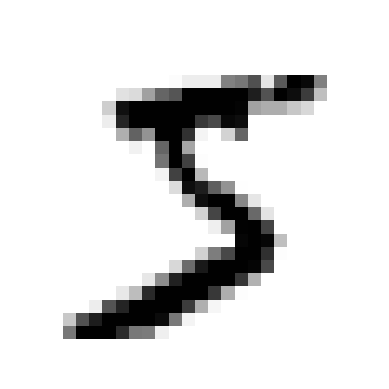

In [24]:
plot_digit(X[0])
plt.show()

In [25]:
y[0]

'5'

In [31]:
X_train, X_test, y_train, y_test = X[:6000], X[:1000], y[:6000], y[:1000]

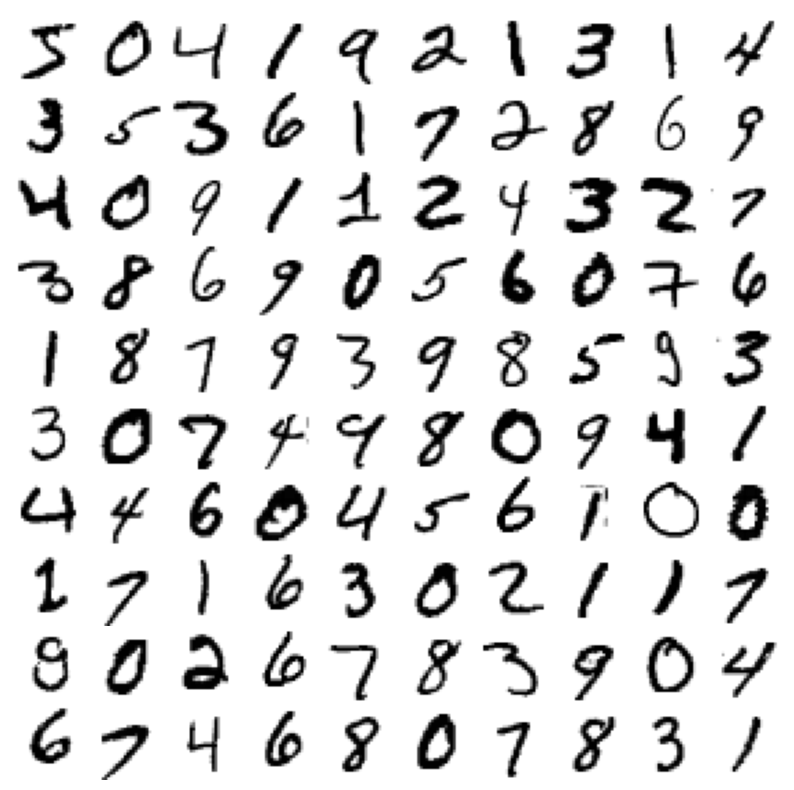

In [41]:
plt.figure(figsize = (10, 10))
for i, image in enumerate(X[:100]):
    plt.subplot(10, 10, i + 1)
    plot_digit(image)
plt.subplots_adjust(wspace= 0, hspace = 0)
save_fig("digits", tight_layout=False)
plt.show()

## Training Binary Classifier

In [67]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [51]:
sgd_clf.predict([X[0]])

array([ True])

## Performance Measures

In [52]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.962 , 0.956 , 0.9665])

In [53]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [63]:
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.914 , 0.9145, 0.9145])

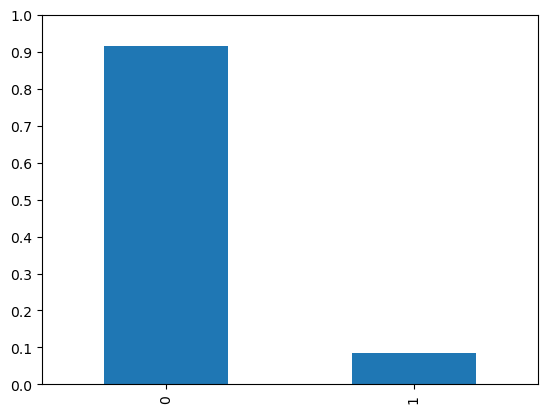

In [111]:
# Extra code - visualization desbalanced data
import pandas as pd
import numpy as np
y_train_5_df = pd.DataFrame(y_train_5.astype(int))
fq = y_train_5_df.iloc[:,0].value_counts()
fq.replace(fq.values, fq.values / sum(fq.values), inplace= True)
fq.plot(kind = 'bar')
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel(None)
plt.show()

In [112]:
del y_train_5_df, fq

### Implementing Cross-Validation

In [116]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3) # add shuffle=True if the dataset is
                                        # not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_sgd = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_5_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_5_folds = y_train_5[test_index]

    clone_sgd.fit(X_train_folds, y_train_5_folds)
    y_pred = clone_sgd.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_5_folds)
    print(n_correct / len(y_test_5_folds))

0.962
0.956
0.9665


### Cross-Validation Predict

In [117]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [120]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[5375,  111],
       [ 120,  394]], dtype=int64)

In [121]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[5486,    0],
       [   0,  514]], dtype=int64)

### Precision and Recall

In [122]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7801980198019802

In [124]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.7801980198019802

In [123]:
recall_score(y_train_5, y_train_pred)

0.7665369649805448

In [125]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.7665369649805448

In [126]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7733071638861629

In [127]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7733071638861629

### Precision / Recall trade-off

In [130]:
y_scores = sgd_clf.decision_function([X[0]])
y_scores

array([38042.34312442])

In [132]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [134]:
threshold = 40000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, 
                             method = "decision_function")

In [139]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

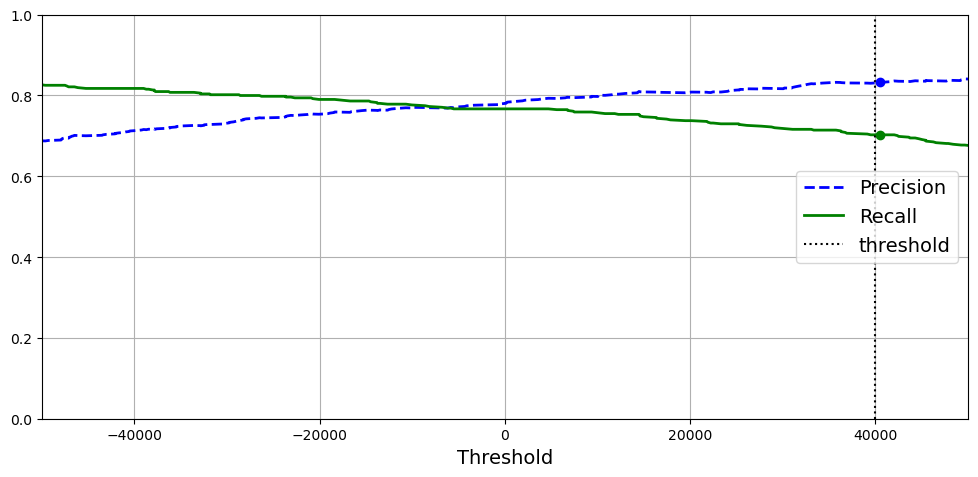

In [151]:
plt.figure(figsize = (10, 5))
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label = "threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

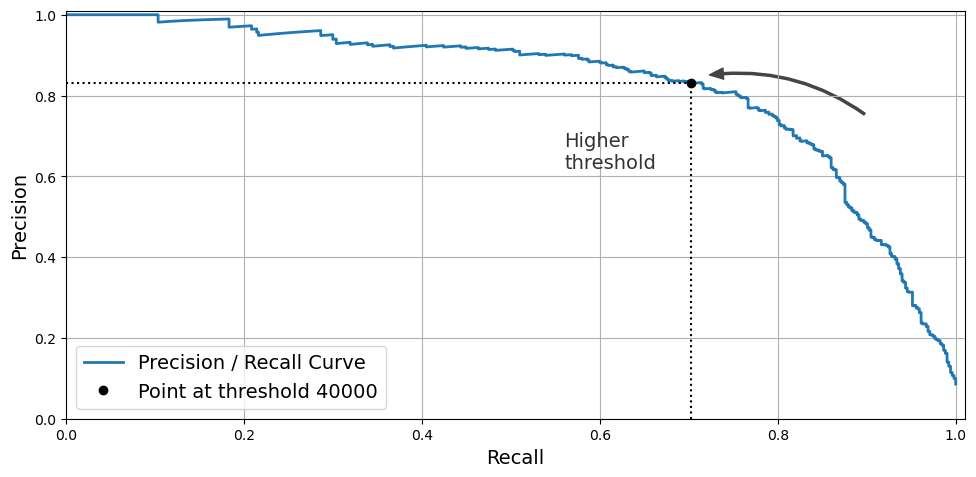

In [198]:
import matplotlib.patches as patches

plt.figure(figsize = (10, 5))
plt.plot(recalls, precisions, linewidth = 2, label = "Precision / Recall Curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label= f"Point at threshold {threshold}")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.90, 0.75), (0.72, 0.85),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.01, 0, 1.01])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [207]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

105660.23702487054

In [210]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [214]:
precision_score(y_train_5, y_train_pred_90)

0.9012345679012346

In [215]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.5680933852140078